2024-04-17 11:44:42.319516: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-17 11:44:42.588616: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 11:44:43.513173: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/ardie85/PHD/Research/code/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:788: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'ansi', 'rgb_array']).
  l

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 7.76     |
|    ep_rew_mean     | 0.03     |
| time/              |          |
|    fps             | 1153     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 7.31        |
|    ep_rew_mean          | 0.02        |
| time/                   |             |
|    fps                  | 990         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009617264 |
|    clip_fraction        | 0.0219      |
|    clip_range           | 0.2         |
|    entropy_loss  

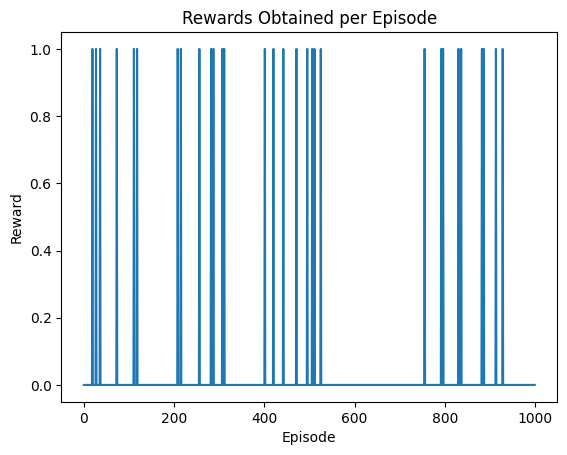

Success rate: 3.00%


In [1]:
import gymnasium as gym
from stable_baselines3 import PPO
import matplotlib.pyplot as plt


env = gym.make("FrozenLake-v1", render_mode="none")

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000)

vec_env = model.get_env()
obs = vec_env.reset()

success_count = 0
episode_rewards = []
num_episodes = 1000

for i in range(num_episodes):
    episode_reward = 0
    success = False

    while True:

        action, _states = model.predict(obs, deterministic=False)
        obs, reward, done, info = vec_env.step(action)
        # vec_env.render()

        episode_reward += reward

        if done:
            success = reward == 1
            if success:
                success_count += 1
            break
            
    
    # VecEnv resets automatically
    # if done:
    #   obs = env.reset()

    episode_rewards.append(episode_reward)
    print("Episode: {}, Reward: {}, Success: {}".format(i, episode_reward, success))

plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Obtained per Episode')
plt.show()

print("Success rate: {:.2f}%".format(success_count / num_episodes * 100))

env.close()